In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
!pip3 install music21

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.8/22.8 MB 8.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 kB 12.9 MB/s eta 0:00:00

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip3 install --upgrade pip


In [4]:
from music21 import *
def read_midi(file):
    
    print("Loading Music File:",file)
    
    notes=[]
    notes_to_parse = None
    
    #parsing a midi file
    midi = converter.parse(file)
  
    #grouping based on different instruments
    s2 = instrument.partitionByInstrument(midi)

    #Looping over all the instruments
    for part in s2.parts:
    
        #select elements of only piano
        if 'Piano' in str(part): 
        
            notes_to_parse = part.recurse() 
      
            #finding whether a particular element is note or a chord
            for element in notes_to_parse:
                
                #note
                if isinstance(element, note.Note):
                    notes.append(str(element.pitch))
                
                #chord
                elif isinstance(element, chord.Chord):
                    notes.append('.'.join(str(n) for n in element.normalOrder))

    return np.array(notes)


In [12]:
#for listing down the file names
import os

#Array Processing
import numpy as np

#specify the path
path='schubert/'

#read all the filenames
files=[i for i in os.listdir(path) if i.endswith(".mid")]

#reading each midi file
notes_array = np.array([read_midi(path+i) for i in files])

Loading Music File: schubert/schumm-1.mid
Loading Music File: schubert/schumm-2.mid
Loading Music File: schubert/schub_d960_4.mid
Loading Music File: schubert/schumm-3.mid
Loading Music File: schubert/schub_d960_1.mid
Loading Music File: schubert/schumm-6.mid
Loading Music File: schubert/schumm-4.mid
Loading Music File: schubert/schub_d960_2.mid
Loading Music File: schubert/schub_d960_3.mid
Loading Music File: schubert/schumm-5.mid
Loading Music File: schubert/schuim-4.mid
Loading Music File: schubert/schuim-1.mid
Loading Music File: schubert/schuim-3.mid
Loading Music File: schubert/schuim-2.mid
Loading Music File: schubert/schubert_D850_4.mid
Loading Music File: schubert/schubert_D935_4.mid
Loading Music File: schubert/schub_d760_4.mid
Loading Music File: schubert/schubert_D850_1.mid
Loading Music File: schubert/schubert_D935_1.mid
Loading Music File: schubert/schub_d760_1.mid
Loading Music File: schubert/schubert_D850_2.mid
Loading Music File: schubert/schubert_D935_2.mid
Loading Mu

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/music21/midi/translate.py:863: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=4, channel=None, data=b'Copyright \xa9 1999 by Bernd Kr\xfcger'>; getting generic Instrument
  warnings.warn(


Loading Music File: schubert/schu_143_1.mid


/var/folders/_b/hf3lpr3x0m19h9rk33qfq2rw0000gn/T/ipykernel_49137/618692659.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  notes_array = np.array([read_midi(path+i) for i in files])


In [13]:
#converting 2D array into 1D array
notes_ = [element for note_ in notes_array for element in note_]

#No. of unique notes
unique_notes = list(set(notes_))
print(len(unique_notes))

343


(array([220.,  39.,  31.,  13.,   7.,   4.,   6.,  13.,   5.,   5.]),
 array([1.0000e+00, 1.5890e+02, 3.1680e+02, 4.7470e+02, 6.3260e+02,
        7.9050e+02, 9.4840e+02, 1.1063e+03, 1.2642e+03, 1.4221e+03,
        1.5800e+03]),
 <BarContainer object of 10 artists>)

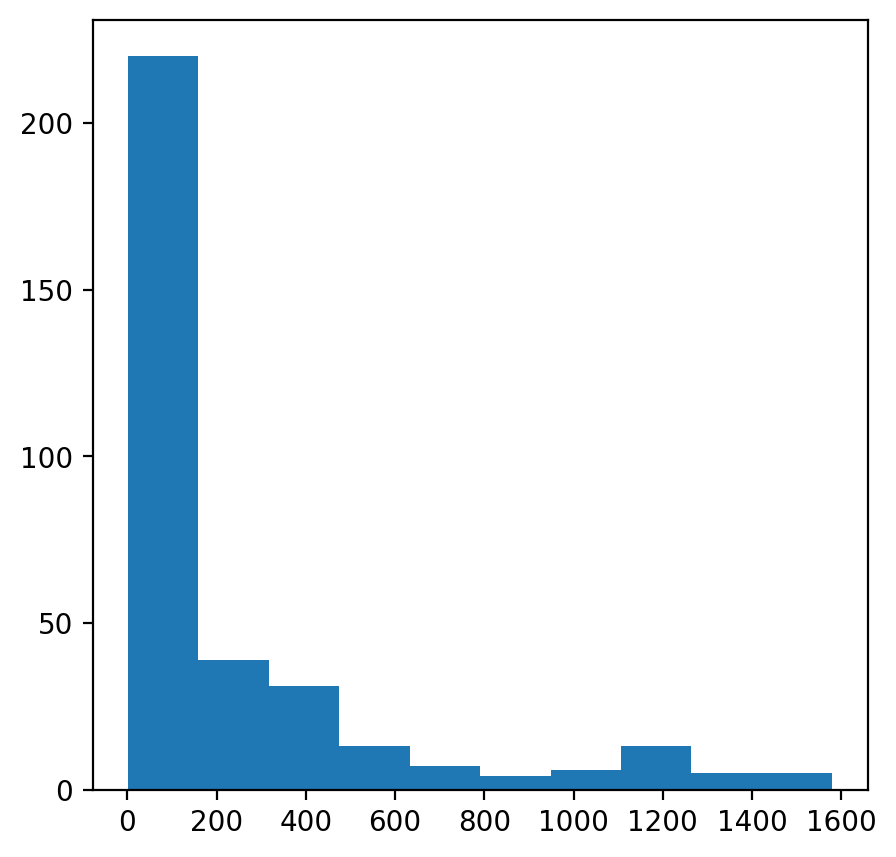

In [14]:
#importing library
from collections import Counter

#computing frequency of each note
freq = dict(Counter(notes_))

#library for visualiation
import matplotlib.pyplot as plt

#consider only the frequencies
no=[count for _,count in freq.items()]

#set the figure size
plt.figure(figsize=(5,5))

#plot
plt.hist(no)

In [15]:
frequent_notes = [note_ for note_, count in freq.items() if count>=50]
print(len(frequent_notes))

181


In [16]:
new_music=[]

for notes in notes_array:
    temp=[]
    for note_ in notes:
        if note_ in frequent_notes:
            temp.append(note_)            
    new_music.append(temp)
    
new_music = np.array(new_music)

/var/folders/_b/hf3lpr3x0m19h9rk33qfq2rw0000gn/T/ipykernel_49137/2871568428.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_music = np.array(new_music)


In [17]:
no_of_timesteps = 32
x = []
y = []

for note_ in new_music:
    for i in range(0, len(note_) - no_of_timesteps, 1):
        
        #preparing input and output sequences
        input_ = note_[i:i + no_of_timesteps]
        output = note_[i + no_of_timesteps]
        
        x.append(input_)
        y.append(output)
        
x=np.array(x)
y=np.array(y)

In [18]:
unique_x = list(set(x.ravel()))
x_note_to_int = dict((note_, number) for number, note_ in enumerate(unique_x))

In [19]:
#preparing input sequences
x_seq=[]
for i in x:
    temp=[]
    for j in i:
        #assigning unique integer to every note
        temp.append(x_note_to_int[j])
    x_seq.append(temp)
    
x_seq = np.array(x_seq)

In [20]:
unique_y = list(set(y))
y_note_to_int = dict((note_, number) for number, note_ in enumerate(unique_y)) 
y_seq=np.array([y_note_to_int[i] for i in y])

In [21]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(x_seq,y_seq,test_size=0.2,random_state=0)

In [22]:
# def lstm():
#   model = Sequential()
#   model.add(LSTM(128,return_sequences=True))
#   model.add(LSTM(128))
#   model.add(Dense(256))
#   model.add(Activation('relu'))
#   model.add(Dense(n_vocab))
#   model.add(Activation('softmax'))
#   model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')
#   return model

In [23]:
from keras.layers import (Dense,
                            Flatten,Conv1D,Embedding,MaxPool1D,Dropout,GlobalMaxPool1D)
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
# import keras.backend as K

# K.clear_session()
model = Sequential()
    
#embedding layer
model.add(Embedding(len(unique_x), 100, input_length=32,trainable=True)) 

model.add(Conv1D(64,3, padding='causal',activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))
    
model.add(Conv1D(128,3,activation='relu',dilation_rate=2,padding='causal'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))

model.add(Conv1D(256,3,activation='relu',dilation_rate=4,padding='causal'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))
          
#model.add(Conv1D(256,5,activation='relu'))    
model.add(GlobalMaxPool1D())
    
model.add(Dense(256, activation='relu'))
model.add(Dense(len(unique_y), activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['acc'])

model.summary()

2022-12-04 16:54:07.341623: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 32, 100)           18100     
                                                                 
 conv1d (Conv1D)             (None, 32, 64)            19264     
                                                                 
 dropout (Dropout)           (None, 32, 64)            0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 16, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 16, 128)           24704     
                                                                 
 dropout_1 (Dropout)         (None, 16, 128)           0         
                                                        

In [24]:
mc=ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', save_best_only=True,verbose=1)

In [25]:
from keras.callbacks import ModelCheckpoint
filepath = "../working/saved_models-improvement-{epoch:02d}-{val_acc:.2f}.h5"
checkpoint = ModelCheckpoint(filepath,monitor = 'val_acc',verbose = 1,save_best_only = True,mode = 'max')
callbacks_list = [checkpoint]

In [27]:
#history = model.fit(np.array(x_tr),np.array(y_tr),batch_size=128,epochs=1000, validation_data=(np.array(x_val),np.array(y_val)),verbose=1)
history = model.fit(np.array(x_tr),np.array(y_tr),batch_size=128,epochs=5, validation_data=(np.array(x_val),np.array(y_val)),verbose=1)

Epoch 1/5
479/479 [==============================] - 29s 61ms/step - loss: 3.6771 - acc: 0.1308 - val_loss: 3.7717 - val_acc: 0.1328
Epoch 2/5
479/479 [==============================] - 30s 62ms/step - loss: 3.5570 - acc: 0.1454 - val_loss: 3.7097 - val_acc: 0.1409
Epoch 3/5
479/479 [==============================] - 31s 65ms/step - loss: 3.4681 - acc: 0.1559 - val_loss: 3.6346 - val_acc: 0.1446
Epoch 4/5
479/479 [==============================] - 29s 61ms/step - loss: 3.3904 - acc: 0.1595 - val_loss: 3.5684 - val_acc: 0.1497
Epoch 5/5
479/479 [==============================] - 46s 97ms/step - loss: 3.3266 - acc: 0.1685 - val_loss: 3.5179 - val_acc: 0.1548


In [22]:
# #loading best model
# from keras.models import load_model
# model = load_model('best_model.h5')

In [28]:
len(x_val)

15314

In [29]:
import random
ind = np.random.randint(0,len(x_val)-1)

random_music = x_val[ind]

predictions=[]
for i in range(10):

    random_music = random_music.reshape(1,no_of_timesteps)

    prob  = model.predict(random_music)[0]
    y_pred= np.argmax(prob,axis=0)
    predictions.append(y_pred)

    random_music = np.insert(random_music[0],len(random_music[0]),y_pred)
    random_music = random_music[1:]
    
print(predictions)

1/1 [==============================] - 0s 17ms/step
[9, 167, 167, 167, 167, 167, 167, 167, 167, 167]


In [30]:
random_music

array([106, 106, 106, 106,  44,   7,  39,  39,  39, 143, 102,  18,  40,
        25,  25,  25, 143, 143, 132,  17, 128, 171,   9, 167, 167, 167,
       167, 167, 167, 167, 167, 167])

In [31]:
x_int_to_note = dict((number, note_) for number, note_ in enumerate(unique_x)) 
predicted_notes = [x_int_to_note[i] for i in predictions]

In [32]:
def convert_to_midi(prediction_output):
   
    offset = 0
    output_notes = []

    # create note and chord objects based on the values generated by the model
    for pattern in prediction_output:
        
        # pattern is a chord
        if ('.' in pattern) or pattern.isdigit():
            notes_in_chord = pattern.split('.')
            notes = []
            for current_note in notes_in_chord:
                
                cn=int(current_note)
                new_note = note.Note(cn)
                new_note.storedInstrument = instrument.Piano()
                notes.append(new_note)
                
            new_chord = chord.Chord(notes)
            new_chord.offset = offset
            output_notes.append(new_chord)
            
        # pattern is a note
        else:
            
            new_note = note.Note(pattern)
            new_note.offset = offset
            new_note.storedInstrument = instrument.Piano()
            output_notes.append(new_note)

        # increase offset each iteration so that notes do not stack
        offset += 1
    midi_stream = stream.Stream(output_notes)
    midi_stream.write('midi', fp='music.mid')

In [33]:
convert_to_midi(predicted_notes)